In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('spark_stream_data.csv')
df.head()

,station_id,record_time,humidity,noise_level,temperature,is_outlier
0,station_820e1c8c6,2024-09-02 10:25:14.234,58.255847,48.682936,24.710104,Null
1,station_ae6910888,2024-09-02 10:25:15.722,60.821224,60.806990,23.703212,Null
2,station_d836b5f86,2024-09-02 10:25:15.722,60.568352,51.764115,22.071110,Null
3,station_e2dee6dd5,2024-09-02 10:25:15.722,64.105529,54.434747,22.991978,Null
4,station_383e7bba3,2024-09-02 10:25:15.722,60.444165,52.754879,26.070302,Null


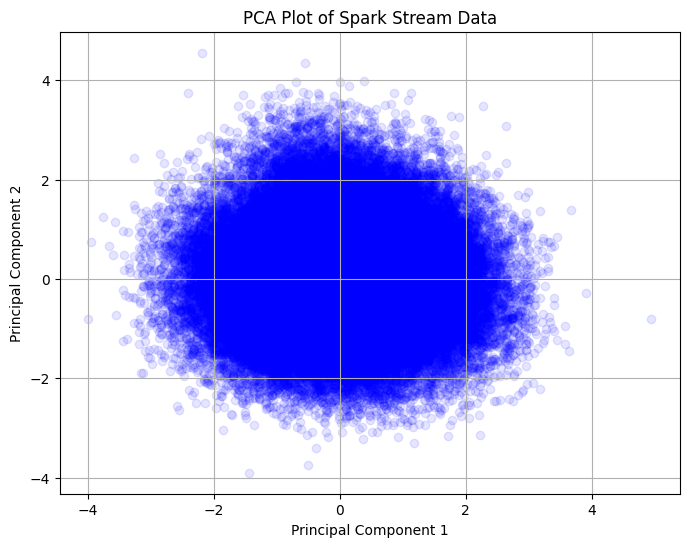

In [3]:
# Step 1: Prepare the data (exclude non-numerical columns if any)
# Assuming 'df' contains only numerical data or dropping non-numeric columns
numeric_df = df[['humidity','noise_level','temperature']]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Step 4: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 5: Plot the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.1)
plt.title('PCA Plot of Spark Stream Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

# Show the plot
plt.show()